# 01. Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\byl19\Downloads\02-2023 Instacart Basket Analysis'

In [3]:
merged = pd.read_pickle(r'C:\Users\byl19\Downloads\02-2023 Instacart Basket Analysis\02 Data\Prepared Data\merged.pkl')

# 02. Questions

## 2.


Text(0, 0.5, 'Orders in mil')

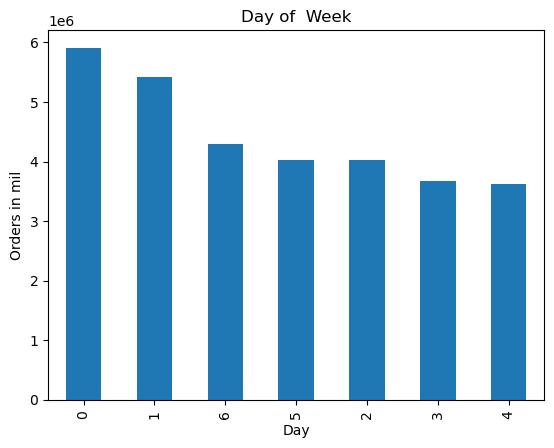

In [4]:
# bar chart
bar = merged['orders_day_of_week'].value_counts().plot.bar()
plt.title('Day of  Week')
plt.xlabel('Day')
plt.ylabel('Orders in mil')

In [12]:
# histogram 
# finding outliers
merged.loc[merged['prices'] > 100]

,user_id,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income,...,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_days,order_freq_flag,region,activity,profile


In [9]:
# replacing outlier values
merged.loc[merged['prices'] > 200, 'prices'] = np.nan

Text(0, 0.5, 'Number of Orders (mil)')

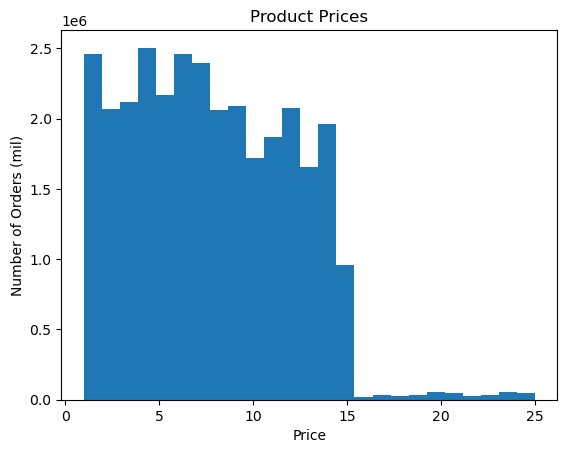

In [18]:
# making histogram
hist = merged['prices'].plot.hist(bins = 25)
plt.title('Product Prices')
plt.xlabel('Price')
plt.ylabel('Number of Orders (mil)')

<AxesSubplot:xlabel='prices', ylabel='prices'>

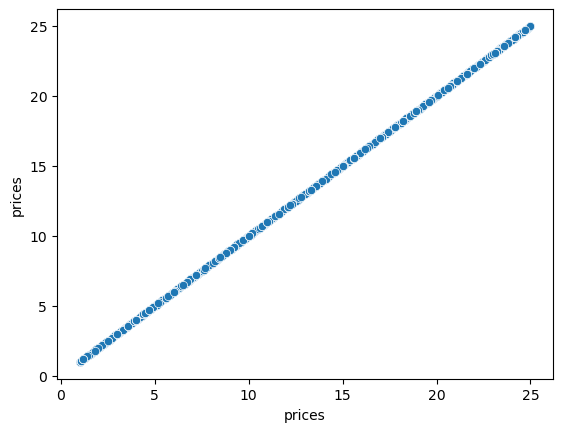

In [15]:
# scatterplot
sns.scatterplot(x = 'prices', y = 'prices',data = merged)

In [8]:
# line chart
# giving random seed and splitting data 70/30
np.random.seed(4)
dev = np.random.rand(len(merged)) <= 0.7

In [9]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [10]:
# assigning 70/30 split
big = merged[dev]
small = merged[~dev]

In [11]:
len(merged)

30964564

In [13]:
len(big) + len(small)

30964564

In [21]:
#making data from out of 30 split
df_2 = small[['orders_day_of_week','prices']]

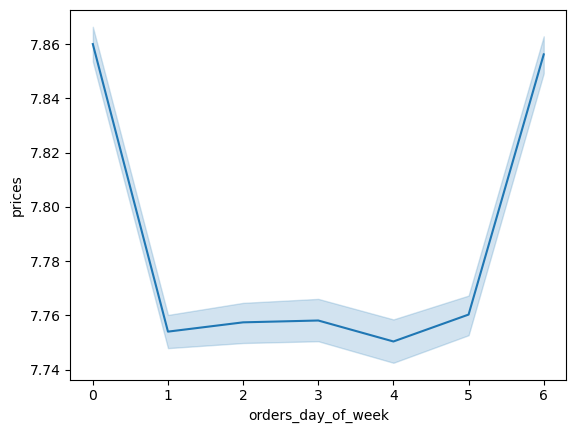

In [22]:
# line chart of 30 split
line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')

In [23]:
# save chart
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_orders_prices.png'))

## 3. 

Text(0, 0.5, 'Orders in mil')

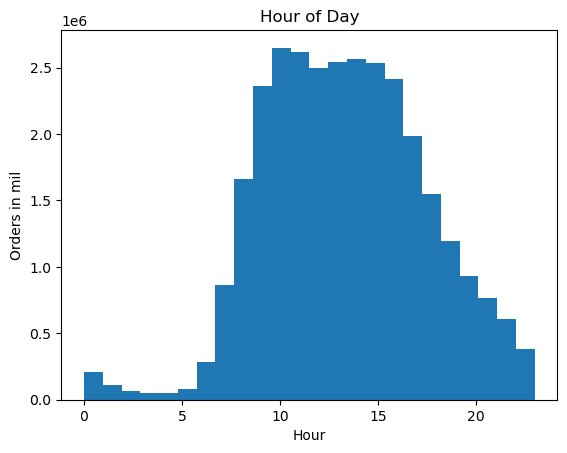

In [5]:
# order_hour_of_day histogram
hist2 = merged['order_hour_of_day'].plot.hist(bins = 24)
plt.title('Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Orders in mil')

#3
This histogram is howing all 24 hours of the day in relation to the amount of orders during a certain hour. This histogram is showing most orders take place between the times of 9 and 16 while rising before 9 and decreasing after 16. This would make sense are those hours are during the day and everything around that is evening/night time. 

In [6]:
# saving image
hist2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hours.png'))

## 4. 

Text(0, 0.5, 'Orders in Mil')

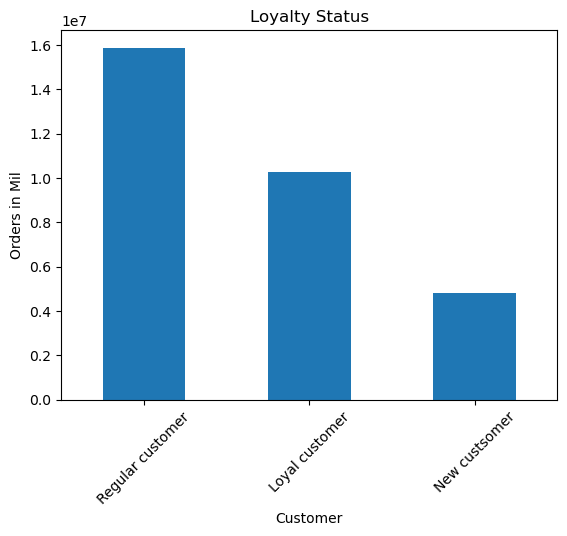

In [39]:
#loyalty flag bar chart
bar2 = merged['loyalty_flag'].value_counts().plot.bar(rot = 45)
plt.title('Loyalty Status')
plt.xlabel('Customer')
plt.ylabel('Orders in Mil')

In [40]:
# saving image
bar2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_bar.png'))

## 5.

In [14]:
# making sample
df_3 = small[['order_hour_of_day','prices']]

Text(0, 0.5, 'Prices')

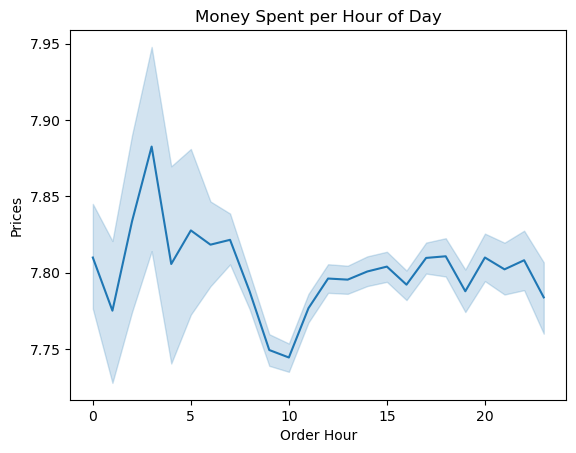

In [15]:
# line chart
line2 = sns.lineplot(data = df_3, x = 'order_hour_of_day', y = 'prices')
plt.title('Money Spent per Hour of Day')
plt.xlabel('Order Hour')
plt.ylabel('Prices')

In [16]:
# saving image
line2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_hour_price.png'))

## 6.

In [33]:
# making sample
df_4 = small[['age','n_dependants']]

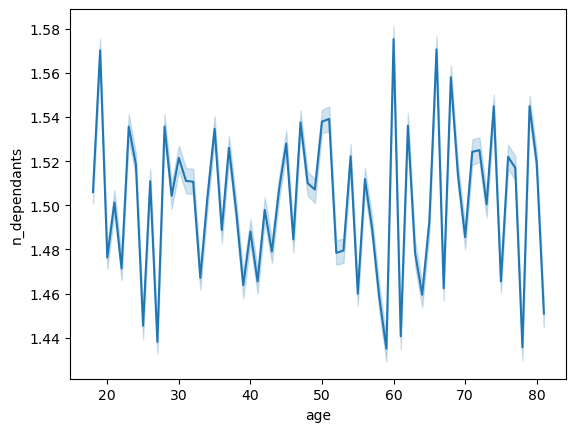

In [34]:
# line chart
line3 = sns.lineplot(data = df_4, x = 'age', y = 'n_dependants')

#6
This line chart is showing age of customer compared to the number of dependants they have. There is really no uniformity or pattern to this line chart and it is filled with a lot of peaks and valleys. If anything once age gets past 60 the highs of number of dependants become a bit higher than ages under 60. To me it seemss that there is no connection between age and number of dependants overall. 

In [35]:
# saving image
line3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_depen.png'))

## 7. 

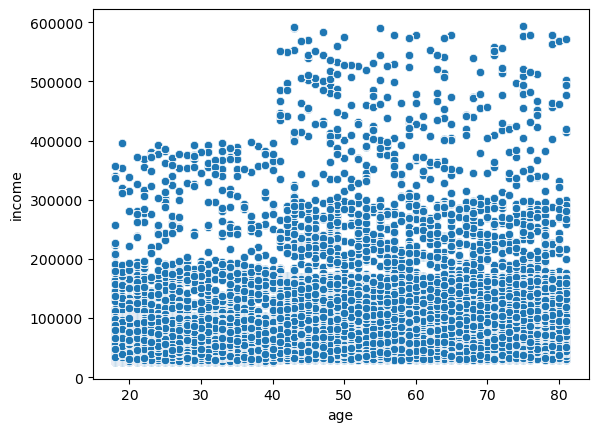

In [37]:
#scatterplot
scatter = sns.scatterplot(x = 'age', y = 'income',data = merged)

#7
In this scatterplot we are plotting age vs income. From what we can see here any income under 20,000 is consistent for every age and there are a lot of them. From ages ~42 and under, any income over 20,000 is a lot less common and those incomes max out at 40,000. For ages over ~42 there are a lot of people with an income from 20,000 - 30,000, moreso than those under 42. After the 30,000 threshold is met those people with an income above it become less and less and income maxes out around 60,000. 

In [38]:
# saving image
scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_income.png'))

In [19]:
merged.columns

Index(['user_id', 'first_name', 'last_name', 'gender', 'state', 'age',
       'date_joined', 'n_dependants', 'fam_status', 'income', 'order_id',
       'order_number', 'orders_day_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'product_name', 'aisle_id', 'department_id', 'prices',
       'price_range_loc', 'busiest days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'average_price', 'spending_flag', 'median_days',
       'order_freq_flag', 'region', 'activity', 'profile'],
      dtype='object')

In [60]:
merged['activity'].value_counts(dropna = False)

high-activity    30964564
Name: activity, dtype: int64

Text(0, 0.5, 'Number of Orders (mil)')

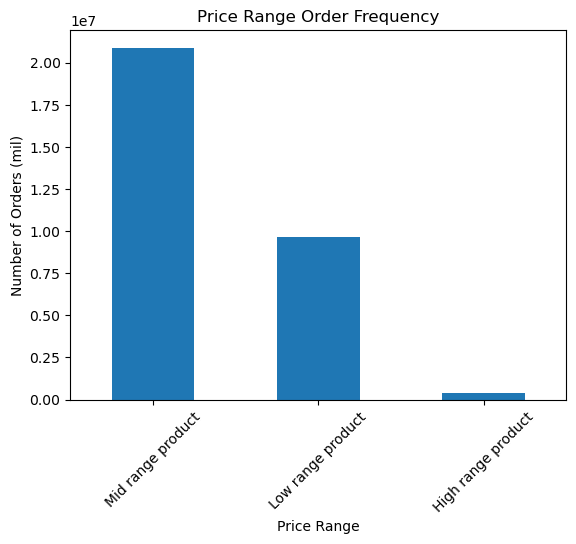

In [23]:
bar3 = merged['price_range_loc'].value_counts().plot.bar(rot = 45)
plt.title('Price Range Order Frequency')
plt.xlabel('Price Range')
plt.ylabel('Number of Orders (mil)')

In [24]:
bar3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'prange_freq.png'))

In [25]:
crosstab = pd.crosstab(merged['department_id'], merged['price_range_loc'], dropna = False)

In [26]:
crosstab

price_range_loc,High range product,Low range product,Mid range product
department_id,,,
1,0,647617,1474114
2,0,15259,19152
3,0,274986,845842
4,0,2585708,6493565
5,0,33046,111581
6,0,73203,182788
7,0,814697,1757204
8,0,28165,64895
9,0,284346,537790


Text(0, 0.5, 'Orders in Mil')

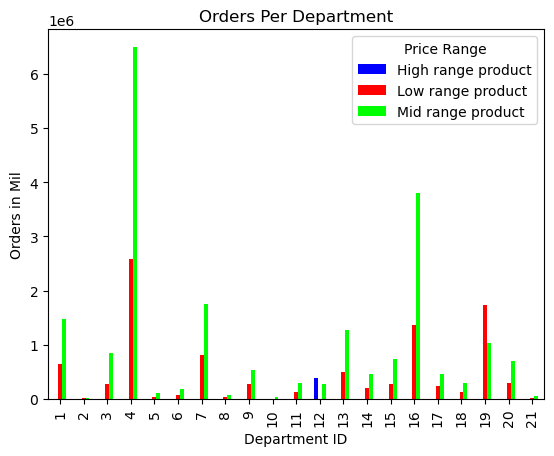

In [37]:
hist2 = crosstab.plot.bar(colormap='brg').legend(title = 'Price Range')
plt.title('Orders Per Department')
plt.xlabel('Department ID')
plt.ylabel('Orders in Mil')


In [38]:
hist2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Dep _ord_freq.png'))

In [42]:
crosstab2 = pd.crosstab(merged['days_since_prior_order'], merged['loyalty_flag'], dropna = False)

In [43]:
crosstab2

loyalty_flag,Loyal customer,New custsomer,Regular customer
days_since_prior_order,,,
-1.0,188712,677486,795085
0.0,239649,40517,157845
1.0,626159,43354,262177
2.0,973214,60662,417492
3.0,1185968,86136,587710
4.0,1202971,107496,747056
5.0,1074717,136069,886697
6.0,1090986,191359,1196418
7.0,1351314,291064,1775061


Text(0, 0.5, '% of customer loyalty')

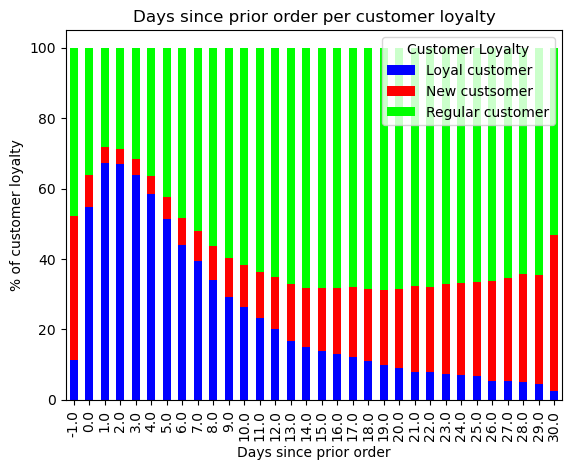

In [50]:
bar5 = crosstab2.apply(lambda x: x*100/sum(x), axis=1).plot.bar(colormap='brg', stacked = True).legend(title = 'Customer Loyalty')
plt.title('Days since prior order per customer loyalty')
plt.xlabel('Days since prior order')
plt.ylabel('% of customer loyalty')

In [51]:
bar5.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'CustLoy_PriorOrd.png'))

In [53]:
crosstab3 = pd.crosstab(merged['department_id'], merged['loyalty_flag'], dropna = False)

Text(0, 0.5, 'Orders in Mil')

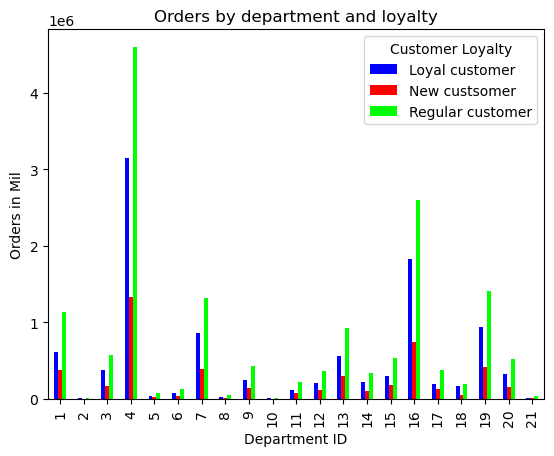

In [54]:
bar6 = crosstab3.plot.bar(colormap='brg').legend(title = 'Customer Loyalty')
plt.title('Orders by department and loyalty')
plt.xlabel('Department ID')
plt.ylabel('Orders in Mil')

In [55]:
bar6.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'CustLoy_Dept.png'))

In [62]:
crosstab4 = pd.crosstab(merged['orders_day_of_week'], merged['region'], dropna = False)

In [63]:
crosstab4

region,Midwest,Northeast,South,West
orders_day_of_week,,,,
0,1390189,1043698,1955352,1519371
1,1263655,954332,1808348,1385351
2,947370,713159,1340387,1023790
3,855316,649305,1229002,935912
4,851501,637781,1205497,930215
5,943396,716128,1342849,1031356
6,1010086,750282,1429704,1101232


Text(0, 0.5, 'Orders in Mil')

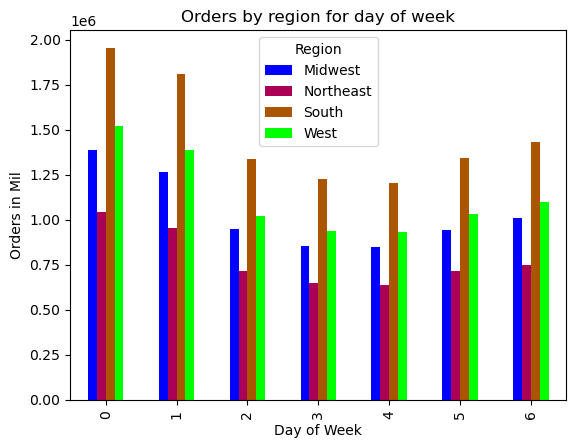

In [100]:
bar7 = crosstab4.plot.bar(colormap='brg').legend(title = 'Region')
plt.title('Orders by region for day of week')
plt.xlabel('Day of Week')
plt.ylabel('Orders in Mil')

In [101]:
bar7.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Orders_region.png'))

In [93]:
crosstab5 = pd.crosstab(merged['profile2'], merged['orders_day_of_week'], dropna = False)

In [94]:
crosstab5

orders_day_of_week,0,1,2,3,4,5,6
profile2,,,,,,,
Middle-Aged Divorced/Widowed,138095,130928,96772,86243,86775,99291,101446
Middle-Aged Married,2059794,1891001,1416941,1286248,1271133,1402383,1511155
Middle-Aged Single,563208,506619,379372,345333,340022,386137,396029
Old Divorced/Widowed,364411,328270,247067,229077,219929,249143,267824
Old Married,1112618,1008168,757530,692052,679922,759454,815369
Young Living with Parents and Siblings,280828,259482,192366,174418,173214,195460,205404
Young Married,978292,890685,655288,599775,595466,662258,698179
Young Single,411364,396533,279370,256389,258533,279603,295898


In [79]:
merged['fam_status'].value_counts(dropna =False)

married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: fam_status, dtype: int64

In [78]:
merged.loc[(merged['age'] > 65) & (merged['fam_status'] == 'married'), 'profile2'] = 'Old Married'

In [80]:
merged.loc[(merged['age'] > 65) & (merged['fam_status'] == 'single'), 'profile2'] = 'Old Single'

In [81]:
merged.loc[(merged['age'] > 65) & (merged['fam_status'] == 'divorced/widowed'), 'profile2'] = 'Old Divorced/Widowed'

In [82]:
merged.loc[(merged['age'] > 65) & (merged['fam_status'] == 'living with parents and siblings'), 'profile2'] = 'Old Living with Parents and Siblings'

In [83]:
merged.loc[(merged['age'] <= 65) & (merged['age'] > 35) & (merged['fam_status'] == 'married'), 'profile2'] = 'Middle-Aged Married'

In [84]:
merged.loc[(merged['age'] <= 65) & (merged['age'] > 35) & (merged['fam_status'] == 'single'), 'profile2'] = 'Middle-Aged Single'

In [85]:
merged.loc[(merged['age'] <= 65) & (merged['age'] > 35) & (merged['fam_status'] == 'divorced/widowed'), 'profile2'] = 'Middle-Aged Divorced/Widowed'

In [86]:
merged.loc[(merged['age'] <= 65) & (merged['age'] > 35) & (merged['fam_status'] == 'living with parents and siblings'), 'profile2'] = 'Middle-Aged Living with Parents and Siblings'

In [87]:
merged.loc[(merged['age'] <= 35) & (merged['fam_status'] == 'married'), 'profile2'] = 'Young Married'

In [89]:
merged.loc[(merged['age'] <= 35) & (merged['fam_status'] == 'single'), 'profile2'] = 'Young Single'

In [90]:
merged.loc[(merged['age'] <= 35) & (merged['fam_status'] == 'divorced/widowed'), 'profile2'] = 'Young Divorced/Widowed'

In [91]:
merged.loc[(merged['age'] <= 35) & (merged['fam_status'] == 'living with parents and siblings'), 'profile2'] = 'Young Living with Parents and Siblings'

In [92]:
merged['profile2'].value_counts(dropna = False)

Middle-Aged Married                       10838655
Old Married                                5825113
Young Married                              5079943
Middle-Aged Single                         2916720
Young Single                               2177690
Old Divorced/Widowed                       1905721
Young Living with Parents and Siblings     1481172
Middle-Aged Divorced/Widowed                739550
Name: profile2, dtype: int64

Text(0, 0.5, 'Orders in Mil')

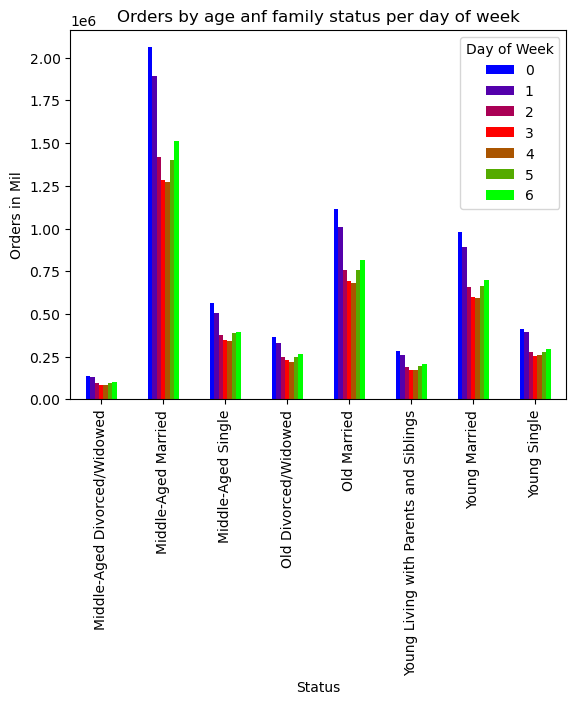

In [102]:
bar8 = crosstab5.plot.bar(colormap='brg').legend(title = 'Day of Week')
plt.title('Orders by age anf family status per day of week')
plt.xlabel('Status')
plt.ylabel('Orders in Mil')

In [103]:
bar8.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Age_famStat_orders.png'))

In [105]:
crosstab6 = pd.crosstab(merged['department_id'], merged['profile2'], dropna = False)

Text(0, 0.5, 'Orders in Mil')

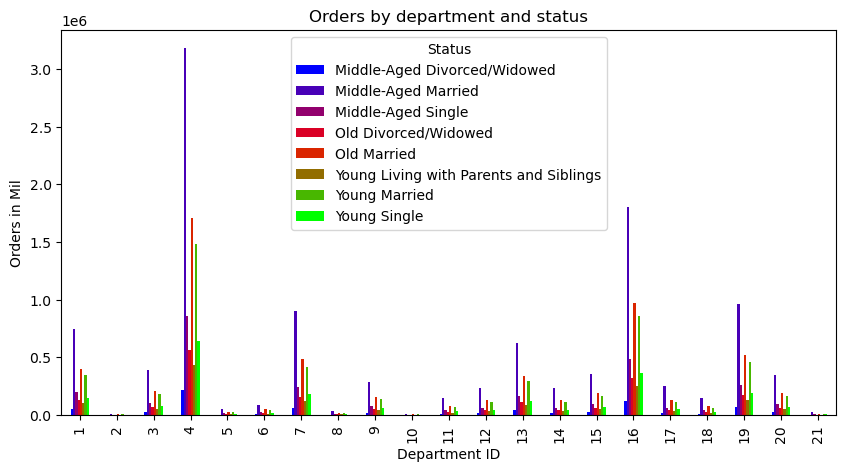

In [111]:
bar9 = crosstab6.plot.bar(colormap='brg', figsize = (10,5)).legend(title = 'Status')
plt.title('Orders by department and status')
plt.xlabel('Department ID')
plt.ylabel('Orders in Mil')

In [112]:
bar9.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Dept_Status.png'))